#연예인 이미지 크롤링

In [74]:
import os
from PIL import Image  # 이미지 형식 변환에 필요 (pip install pillow)
import pandas as pd  # CSV 읽기를 위해 필요 (pip install pandas)
from bing_image_downloader import downloader  # pip install bing-image-downloader

# CSV 파일 경로
csv_file_path = 'C:/GitHub/Stupid_Moon/deu_university/Digital Image Fundamentals/Teamproject/people_list.csv'  # 환경에 맞게 경로 수정

# 디렉토리 설정
base_directory_path = 'C:/GitHub/Stupid_Moon/deu_university/Digital Image Fundamentals/Teamproject/data_set'

# CSV에서 카테고리 읽기
df = pd.read_csv(csv_file_path)

# 열 이름 확인 및 출력
print("CSV 파일의 열 이름:", df.columns)

# 'Name'이라는 열이 존재하는지 확인
if 'Name' in df.columns:
    categories = df['Name'].tolist()  # 'Name' 열에 각 인물 이름이 있다고 가정
else:
    raise KeyError("CSV 파일에 'Name'이라는 열이 존재하지 않습니다. 올바른 열 이름을 확인해주세요.")

# 각 카테고리별 데이터를 다운로드 및 저장
for query in categories:
    query_path = os.path.join(base_directory_path, query)
    downloader.download(query, limit=100, output_dir=base_directory_path, adult_filter_off=True, force_replace=False, timeout=60)

    # 단일 폴더에 저장
    final_path = os.path.join(base_directory_path, query)
    os.makedirs(final_path, exist_ok=True)

    # 이미지 정리 및 변환 함수
    def convert_and_delete_originals(query_path, final_path):
        if os.path.exists(query_path):
            file_names = os.listdir(query_path)
            for file_name in file_names:
                src_path = os.path.join(query_path, file_name)
                dest_file_name = os.path.splitext(file_name)[0] + ".jpeg"  # .jpeg 확장자로 변경
                dest_path = os.path.join(final_path, dest_file_name)

                # 이미지 변환 및 기존 파일 삭제
                try:
                    with Image.open(src_path) as img:
                        rgb_img = img.convert("RGB")  # RGB로 변환 (JPEG는 RGB만 지원)
                        rgb_img.save(dest_path, "JPEG")  # JPEG 형식으로 저장
                        print(f'[Converted & Saved] {dest_file_name}')
                        os.remove(src_path)  # 변환 완료된 원본 파일 삭제
                except Exception as e:
                    print(f"[Error] {file_name}: 변환 실패로 파일 삭제 처리.")
                    os.remove(src_path)  # 변환 실패 시 파일 삭제
        else:
            print(f"[Warning] {query_path} 경로가 존재하지 않습니다.")

    # 이미지 변환 및 기존 파일 삭제 실행
    convert_and_delete_originals(query_path, final_path)


CSV 파일의 열 이름: Index(['Name'], dtype='object')
[%] Downloading Images to C:\GitHub\Stupid_Moon\deu_university\Digital Image Fundamentals\Teamproject\data_set\Song Joong-ki


[!!]Indexing page: 1

[%] Indexed 95 Images on Page 1.


[%] Downloading Image #1 from https://data.ibtimes.sg/en/full/6688/song-joong-ki.jpg?w=717
[%] File Downloaded !

[%] Downloading Image #2 from https://assets.vogue.in/photos/6336c0df92205c07fe758f4a/2:3/w_2560%2Cc_limit/song-joong-ki.jpeg
[%] File Downloaded !

[%] Downloading Image #3 from https://0.soompi.io/wp-content/uploads/2016/04/30135701/song-joong-ki-top-ten-6.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.nme.com/wp-content/uploads/2023/09/song-joong-ki-getty.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://1.bp.blogspot.com/-xmYydGIuU0w/WxqQ7T9DYPI/AAAAAAAALG8/0qFFLBuSJkc0g3Duu1Qgz4lr6ChCGbYnACLcBGAs/s1600/song-joong-ki-wallpaper%2B%252834%2529.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://0.

# 트레이닝  & 테스트 셋 분리

In [61]:
import tensorflow as tf
from tensorflow.keras import layers, models

# 데이터셋 경로
dataset_path = r"data_set"  # 데이터셋 폴더 경로

# 데이터셋 로드 및 Train/Test 분리
original_train_dataset = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    image_size=(224, 224),  # 이미지 크기 조정
    batch_size=32,          # 배치 크기
    validation_split=0.2,   # 데이터의 20%는 검증용
    subset="training",      # 학습 데이터
    seed=42                 # 재현 가능한 랜덤 시드
)

original_test_dataset = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    image_size=(224, 224),
    batch_size=32,
    validation_split=0.2,
    subset="validation",    # 검증 데이터
    seed=42
)

# 클래스 이름 확인
print("클래스 이름:", original_train_dataset.class_names)

# 데이터셋 크기 확인
print(f"Train 데이터셋 크기: {len(original_train_dataset)}")
print(f"Test 데이터셋 크기: {len(original_test_dataset)}")


Found 4793 files belonging to 169 classes.
Using 3835 files for training.
Found 4793 files belonging to 169 classes.
Using 958 files for validation.
클래스 이름: ['Ahn Young-mi', 'Baek Ye-rin', 'Baekhyun', 'Bang Chan', 'Boom', 'Cha Eun-woo', 'Chaeyoung', 'Changbin', 'Chen', 'Cho Jung-seok', 'Choerry', 'Chungha', 'DK', 'Dahyun', 'Danielle', 'Dino', 'Do Kyung-soo', 'Felix', 'Go Ara', 'Gong Yoo', 'Haerin', 'Haha', 'Han', 'Han Hyo-joo', 'Han So-hee', 'Hani', 'Heejin', 'Hong Jin-young', 'Hoshi', 'Hwasa', 'Hyein', 'Hyoyeon', 'Hyun Bin', 'Hyunjin', 'I.N', 'IU', 'Im Soo-jung', 'Irene', 'J-Hope', 'Jang Do-yeon', 'Jang Dong-gun', 'Jang Ki-yong', 'Jang Yoon-jeong', 'Jay Park', 'Jennie', 'Jeon So-min', 'Jeong Dong-won', 'Jeonghan', 'Jeongyeon', 'Jihyo', 'Jimin', 'Jin', 'Jinsoul', 'Jisoo', 'Jo Se-ho', 'Joshua', 'Joy', 'Jun', 'Jun Hyun-moo', 'Jun Ji-hyun', 'Jung Hae-in', 'Jung Hyung-don', 'Jung Ryeo-won', 'Jung So-min', 'Jung Yu-mi', 'Jungkook', 'Kai', 'Kang Daniel', 'Kang Ha-neul', 'Kang Ho-dong', 'Key'

# 데이터 증강 및 전처리

In [12]:
# 데이터 증강
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
])

# 데이터 정규화
normalization_layer = layers.Rescaling(1./255)

# 데이터 증강 및 정규화를 결합한 함수
def augment_and_normalize(images, labels):
    images = data_augmentation(images)
    images = normalization_layer(images)
    return images, labels

# 전처리 적용
train_dataset = original_train_dataset.map(augment_and_normalize, num_parallel_calls=tf.data.AUTOTUNE)
test_dataset = original_test_dataset.map(lambda x, y: (normalization_layer(x), y), num_parallel_calls=tf.data.AUTOTUNE)

# 성능 최적화 (캐싱 및 프리페치)
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset = test_dataset.cache().prefetch(buffer_size=tf.data.AUTOTUNE)


# 간단한 CNN 모델 설계

In [13]:
# 클래스 수 설정
num_classes = len(original_train_dataset.class_names)

# CNN 모델 설계
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # 드롭아웃 추가
    layers.Dense(num_classes, activation='softmax')  # 클래스 수 반영
])

# 모델 요약 출력
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)      

# 모델 컴파일 및 학습

In [39]:
# 모델 컴파일
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # 정수형 레이블용
    metrics=['accuracy']
)

# 모델 학습
history = model.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=100
)


Epoch 1/100
120/120 [==============================] - 95s 781ms/step - loss: 1.0798 - accuracy: 0.7293 - val_loss: 8.9122 - val_accuracy: 0.0230
Epoch 2/100
120/120 [==============================] - 77s 642ms/step - loss: 0.8431 - accuracy: 0.7927 - val_loss: 8.7708 - val_accuracy: 0.0261
Epoch 3/100
120/120 [==============================] - 53s 438ms/step - loss: 0.7498 - accuracy: 0.8091 - val_loss: 9.1219 - val_accuracy: 0.0271
Epoch 4/100
120/120 [==============================] - 50s 413ms/step - loss: 0.6561 - accuracy: 0.8339 - val_loss: 9.0926 - val_accuracy: 0.0261
Epoch 5/100
120/120 [==============================] - 47s 391ms/step - loss: 0.6044 - accuracy: 0.8490 - val_loss: 8.9622 - val_accuracy: 0.0292
Epoch 6/100
120/120 [==============================] - 46s 382ms/step - loss: 0.4938 - accuracy: 0.8709 - val_loss: 10.4861 - val_accuracy: 0.0261
Epoch 7/100
120/120 [==============================] - 44s 371ms/step - loss: 0.4944 - accuracy: 0.8725 - val_loss: 10.3866

###  실제 프로그램 코드

In [40]:
# CNN 모델에서 Flatten 레이어 이전까지 출력하도록 설정
feature_extractor = models.Model(inputs=model.input, outputs=model.layers[-3].output)

# 이미지에서 CNN 특징 추출
def extract_cnn_features(image):
    image = tf.expand_dims(image, axis=0)  # 배치 차원 추가
    image = normalization_layer(image)    # 정규화
    features = feature_extractor.predict(image)
    return features.flatten()  # Flatten된 벡터 반환


In [41]:
# RGB 히스토그램 계산 및 정규화
def calculate_histogram(image):
    image = image.numpy()
    hist_r = np.histogram(image[:, :, 0], bins=256, range=(0, 256))[0]
    hist_g = np.histogram(image[:, :, 1], bins=256, range=(0, 256))[0]
    hist_b = np.histogram(image[:, :, 2], bins=256, range=(0, 256))[0]
    
    # 정규화
    hist_r = hist_r / np.sum(hist_r)
    hist_g = hist_g / np.sum(hist_g)
    hist_b = hist_b / np.sum(hist_b)
    
    return np.concatenate([hist_r, hist_g, hist_b])  # R, G, B 결합


In [42]:
def combine_features(image):
    # CNN 특징 추출
    cnn_features = extract_cnn_features(image)
    
    # 히스토그램 특징 추출
    hist_features = calculate_histogram(image)
    
    # 결합 (하나의 벡터로)
    combined_features = np.concatenate([cnn_features, hist_features])
    return combined_features


In [43]:
import numpy as np

combined_train_features = []
train_labels = []

for images, labels in original_train_dataset:
    for image, label in zip(images, labels):
        combined_features = combine_features(image)
        combined_train_features.append(combined_features)
        train_labels.append(label.numpy())

# Numpy 배열로 변환
combined_train_features = np.array(combined_train_features)
train_labels = np.array(train_labels)


1/1 [==============================] - 0s 30ms/step


In [44]:
from sklearn.metrics.pairwise import cosine_similarity

# 유사도 계산 및 가장 유사한 인덱스 반환
def find_most_similar_combined(input_image):
    input_features = combine_features(input_image)
    similarities = cosine_similarity([input_features], combined_train_features)
    most_similar_index = np.argmax(similarities)
    return most_similar_index, similarities[0][most_similar_index]


In [45]:
def display_similar_result(input_image, dataset):
    most_similar_index, similarity_score = find_most_similar_combined(input_image)
    similar_image = list(dataset.as_numpy_iterator())[most_similar_index][0]  # 원본 이미지 가져오기

    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.title("Input Image")
    plt.imshow(input_image.numpy().astype("uint8"))
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.title(f"Most Similar (Score: {similarity_score:.2f})")
    plt.imshow(similar_image.astype("uint8"))
    plt.axis("off")

    plt.show()


1/1 [==============================] - 0s 186ms/step


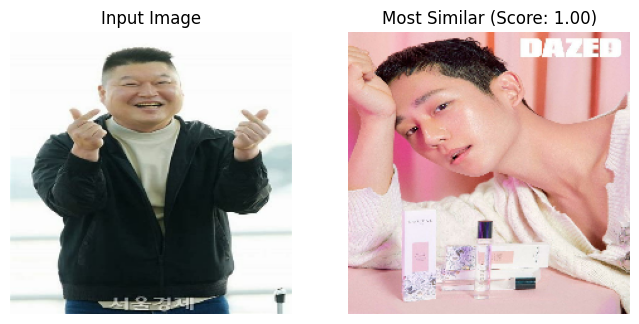

In [53]:
import matplotlib.pyplot as plt

# 학습 데이터셋에서 모든 이미지를 리스트로 추출
all_images = []
all_labels = []

for images, labels in original_train_dataset:
    for image, label in zip(images, labels):
        all_images.append(image)
        all_labels.append(label.numpy())

# 입력 이미지와 유사한 데이터 검색 및 시각화
def display_similar_result(input_image, all_images):
    most_similar_index, similarity_score = find_most_similar_combined(input_image)
    similar_image = all_images[most_similar_index]  # 유사 이미지 가져오기

    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.title("Input Image")
    plt.imshow(input_image.numpy().astype("uint8"))
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.title(f"Most Similar (Score: {similarity_score:.2f})")
    plt.imshow(similar_image.numpy().astype("uint8"))
    plt.axis("off")

    plt.show()

# 테스트용 이미지 로드
test_image_path = "test.jpeg"
test_image = tf.io.read_file(test_image_path)
test_image = tf.image.decode_jpeg(test_image, channels=3)
test_image = tf.image.resize(test_image, [224, 224])

# 유사 이미지 검색 및 시각화
display_similar_result(test_image, all_images)


# 시도

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=100,
    callbacks=[early_stopping]
)


# 전체 코드 (TEST)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

# 데이터셋 경로
dataset_path = r"data_set"  # 데이터셋 폴더 경로

# 데이터셋 로드 및 Train/Test 분리
original_train_dataset = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    image_size=(224, 224),  # 이미지 크기 조정
    batch_size=32,          # 배치 크기
    validation_split=0.2,   # 데이터의 20%는 검증용
    subset="training",      # 학습 데이터
    seed=42                 # 재현 가능한 랜덤 시드
)

original_test_dataset = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    image_size=(224, 224),
    batch_size=32,
    validation_split=0.2,
    subset="validation",    # 검증 데이터
    seed=42
)

# 클래스 이름 확인
print("클래스 이름:", original_train_dataset.class_names)

# 데이터 증강
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.2),
    layers.RandomBrightness(factor=0.2)
])

# 데이터 정규화
normalization_layer = layers.Rescaling(1./255)

# 데이터 증강 및 정규화를 결합한 함수
def augment_and_normalize(images, labels):
    images = data_augmentation(images)
    images = normalization_layer(images)
    return images, labels

# 전처리 적용
train_dataset = original_train_dataset.map(augment_and_normalize, num_parallel_calls=tf.data.AUTOTUNE)
test_dataset = original_test_dataset.map(lambda x, y: (normalization_layer(x), y), num_parallel_calls=tf.data.AUTOTUNE)

# 성능 최적화 (캐싱 및 프리페치)
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset = test_dataset.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

# 클래스 수 설정
num_classes = len(original_train_dataset.class_names)

# ResNet50 모델을 특징 추출기로 설정
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
feature_extractor = tf.keras.Sequential([
    resnet_model,
    layers.GlobalAveragePooling2D()
])

# CNN 모델 설계
model = models.Sequential([
    resnet_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.01)),
    layers.Dropout(0.6),
    layers.Dense(num_classes, activation='softmax')
])

# 모델 컴파일
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # 정수형 레이블용
    metrics=['accuracy']
)

# 조기 종료 콜백 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 모델 학습
history = model.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=100,
    callbacks=[early_stopping]
)

# CNN 특징 추출 함수
def extract_cnn_features(image):
    image = tf.expand_dims(image, axis=0)  # 배치 차원 추가
    image = normalization_layer(image)    # 정규화
    features = feature_extractor.predict(image)
    return features.flatten()  # Flatten된 벡터 반환

# RGB 히스토그램 계산 및 정규화
def calculate_histogram(image):
    image = image.numpy()
    hist_r = np.histogram(image[:, :, 0], bins=256, range=(0, 256))[0]
    hist_g = np.histogram(image[:, :, 1], bins=256, range=(0, 256))[0]
    hist_b = np.histogram(image[:, :, 2], bins=256, range=(0, 256))[0]
    
    # 정규화
    hist_r = hist_r / np.sum(hist_r)
    hist_g = hist_g / np.sum(hist_g)
    hist_b = hist_b / np.sum(hist_b)
    
    return np.concatenate([hist_r, hist_g, hist_b])

# CNN 특징과 히스토그램 특징 결합
def combine_features(image):
    cnn_features = extract_cnn_features(image)
    hist_features = calculate_histogram(image)
    combined_features = np.concatenate([cnn_features * 0.8, hist_features * 0.2])
    return combined_features

# 학습 데이터 특징 추출
combined_train_features = []
train_labels = []

for images, labels in original_train_dataset:
    for image, label in zip(images, labels):
        combined_features = combine_features(image)
        combined_train_features.append(combined_features)
        train_labels.append(label.numpy())

# Numpy 배열로 변환
combined_train_features = np.array(combined_train_features)
train_labels = np.array(train_labels)

# 유사도 계산 함수
def find_most_similar_combined(input_image):
    input_features = combine_features(input_image)
    similarities = cosine_similarity([input_features], combined_train_features)
    most_similar_index = np.argmax(similarities)
    return most_similar_index, similarities[0][most_similar_index]

# 입력 이미지와 가장 유사한 이미지 시각화
def display_similar_result(input_image, all_images):
    most_similar_index, similarity_score = find_most_similar_combined(input_image)
    similar_image = all_images[most_similar_index]

    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.title("Input Image")
    plt.imshow(input_image.numpy().astype("uint8"))
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.title(f"Most Similar (Score: {similarity_score:.2f})")
    plt.imshow(similar_image.numpy().astype("uint8"))
    plt.axis("off")

    plt.show()

# 학습 데이터셋에서 모든 이미지를 리스트로 추출
all_images = []
for images, labels in original_train_dataset:
    all_images.extend([image for image in images])

# 테스트용 이미지 로드
test_image_path = "test.jpg"
test_image = tf.io.read_file(test_image_path)
test_image = tf.image.decode_jpeg(test_image, channels=3)
test_image = tf.image.resize(test_image, [224, 224])

# 유사 이미지 검색 및 시각화
display_similar_result(test_image, all_images)


# 시도 2

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, Subset
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time
import copy

# 데이터셋 경로
data_path = "data_set"  # 데이터셋 최상위 경로

# 하이퍼파라미터 설정
batch_size = 32
random_seed = 555
num_epochs = 25
learning_rate = 0.001

# 랜덤 시드 고정
torch.manual_seed(random_seed)

# 데이터 전처리
data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),  # 이미지 크기 조정
    transforms.ToTensor(),         # 텐서 변환
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # 정규화
])

# 데이터셋 로드
dataset = datasets.ImageFolder(root=data_path, transform=data_transforms)

# 데이터 분리 (train, validation, test)
train_idx, tmp_idx = train_test_split(list(range(len(dataset))), test_size=0.4, random_state=random_seed)
val_idx, test_idx = train_test_split(tmp_idx, test_size=0.5, random_state=random_seed)

datasets_split = {
    'train': Subset(dataset, train_idx),
    'valid': Subset(dataset, val_idx),
    'test': Subset(dataset, test_idx),
}

# DataLoader 생성
dataloaders = {
    split: DataLoader(datasets_split[split], batch_size=batch_size, shuffle=True, num_workers=4)
    for split in ['train', 'valid', 'test']
}

# 클래스 이름 확인
class_names = dataset.classes
print("클래스 이름:", class_names)

# GPU 디바이스 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Pretrained 모델 로드 (ResNet50)
model = models.resnet50(pretrained=True)

# 마지막 레이어 수정 (클래스 수에 맞게 설정)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, len(class_names))  # 클래스 수에 맞게 출력 수정
model = model.to(device)

# 손실 함수 및 옵티마이저 설정
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# 학습 루프 정의
def train_model(model, criterion, optimizer, dataloaders, num_epochs=25):
    since = time.time()
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch + 1}/{num_epochs}')
        print('-' * 10)

        # 학습 및 검증 단계
        for phase in ['train', 'valid']:
            if phase == 'train':
                model.train()  # 학습 모드
            else:
                model.eval()   # 평가 모드

            running_loss = 0.0
            running_corrects = 0

            # 배치별 데이터 처리
            for inputs, labels in dataloaders[phase]:
                inputs, labels = inputs.to(device), labels.to(device)

                optimizer.zero_grad()

                # Forward
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # Backward + 최적화 (학습 단계에서만 수행)
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # 통계 업데이트
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(datasets_split[phase])
            epoch_acc = running_corrects.double() / len(datasets_split[phase])

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # 검증 정확도가 향상되면 최적의 모델 저장
            if phase == 'valid' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:.4f}')

    # 최적의 가중치를 모델에 로드
    model.load_state_dict(best_model_wts)
    return model

# 모델 학습
model = train_model(model, criterion, optimizer, dataloaders, num_epochs=num_epochs)

# 테스트 결과 확인
def test_model(model, dataloader):
    model.eval()
    running_corrects = 0

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            running_corrects += torch.sum(preds == labels.data)

    acc = running_corrects.double() / len(datasets_split['test'])
    print(f'Test Acc: {acc:.4f}')

test_model(model, dataloaders['test'])

# 샘플 결과 시각화
def visualize_model(model, dataloader, num_images=6):
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for i in range(inputs.size(0)):
                images_so_far += 1
                ax = plt.subplot(num_images // 2, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f'Predicted: {class_names[preds[i]]}')
                img = inputs.cpu().data[i].numpy().transpose((1, 2, 0))
                img = img * 0.229 + 0.485  # 비정규화
                ax.imshow(img)

                if images_so_far == num_images:
                    return

visualize_model(model, dataloaders['test'])
